--- Data Checks ---
Number of duplicate rows: 0
DataFrame shape after removing duplicates: (1143, 13)

Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

--- Descriptive Statistics ---


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000



--- Visualizing Key Feature Distributions ---


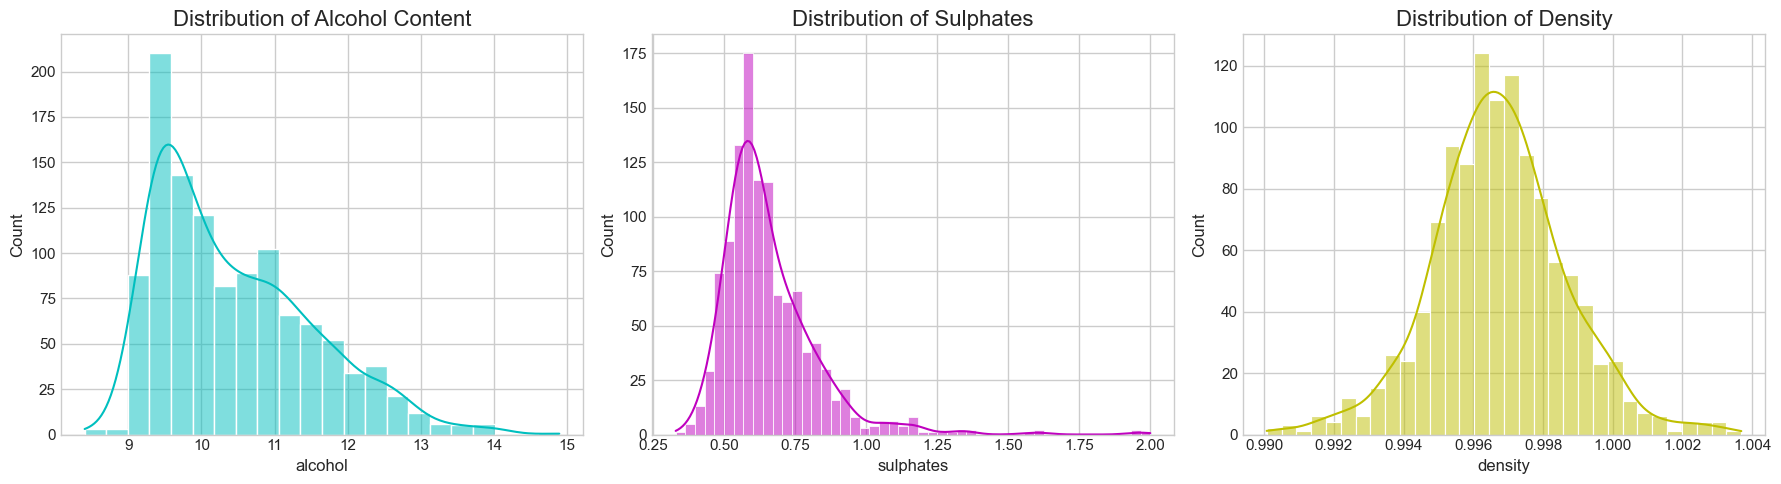


--- Boxplots of Features by Wine Quality ---


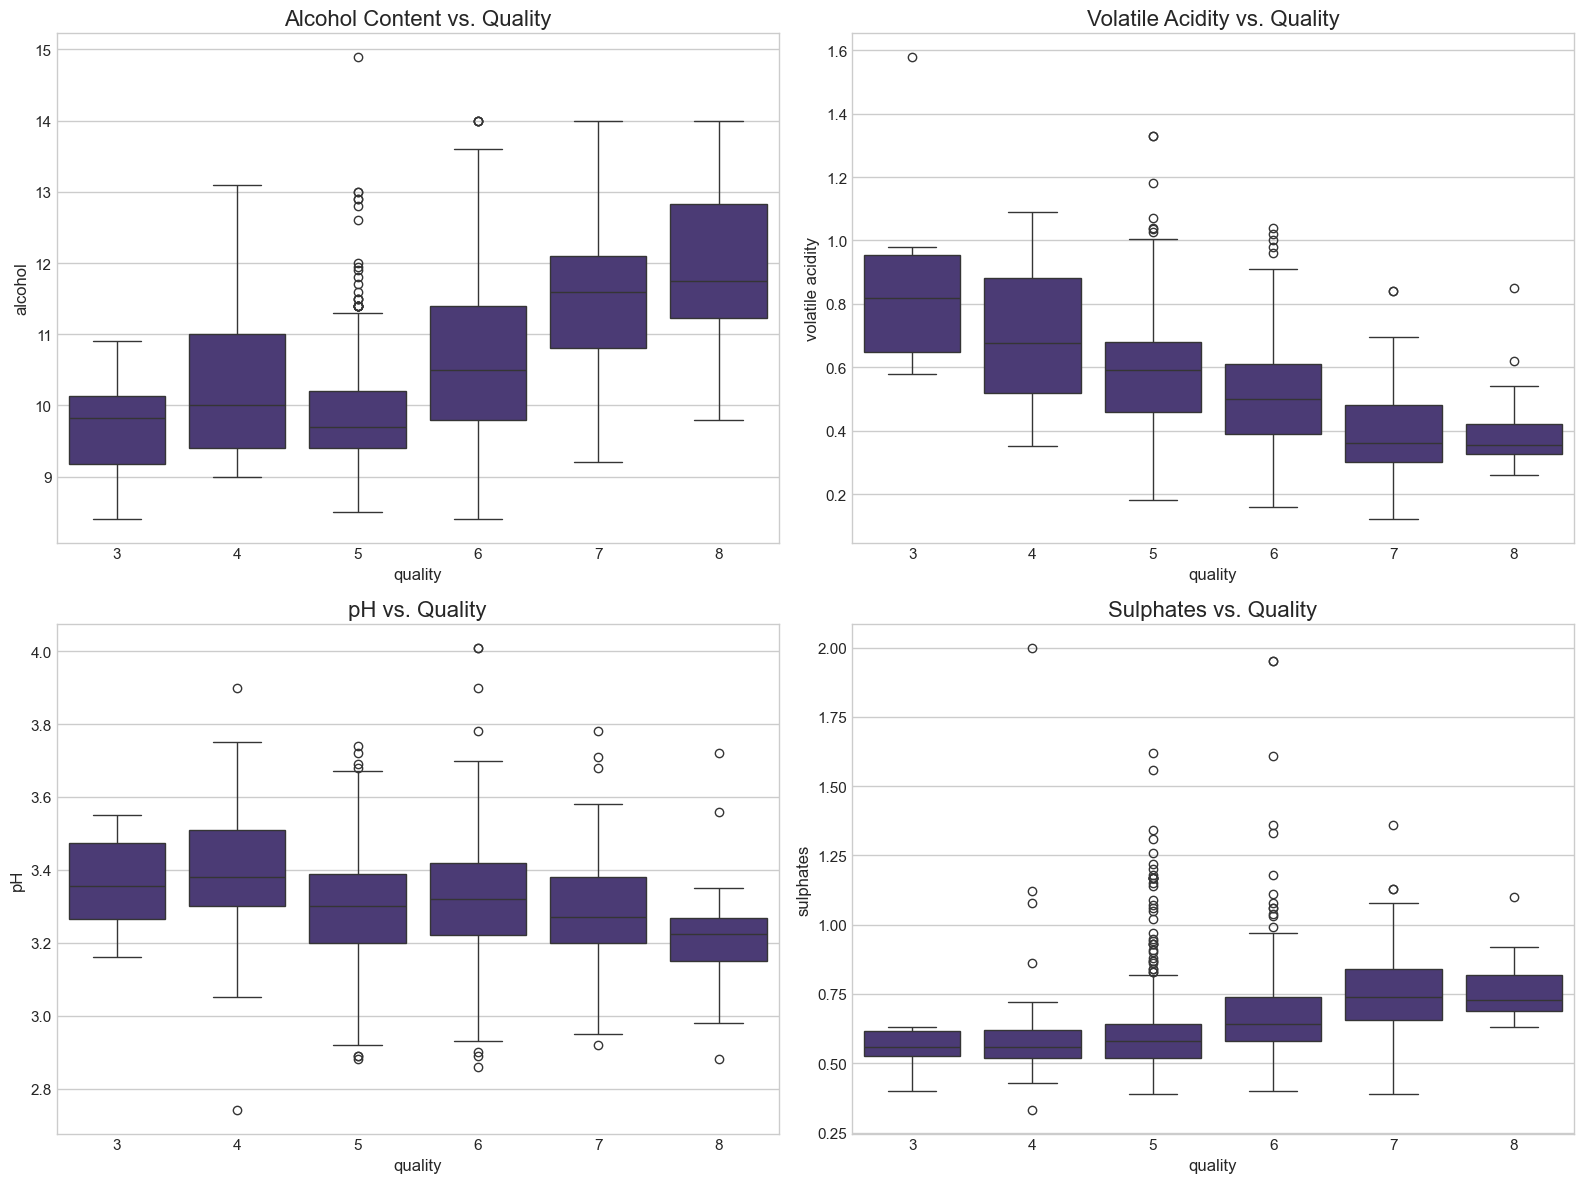


--- Correlation Heatmap ---


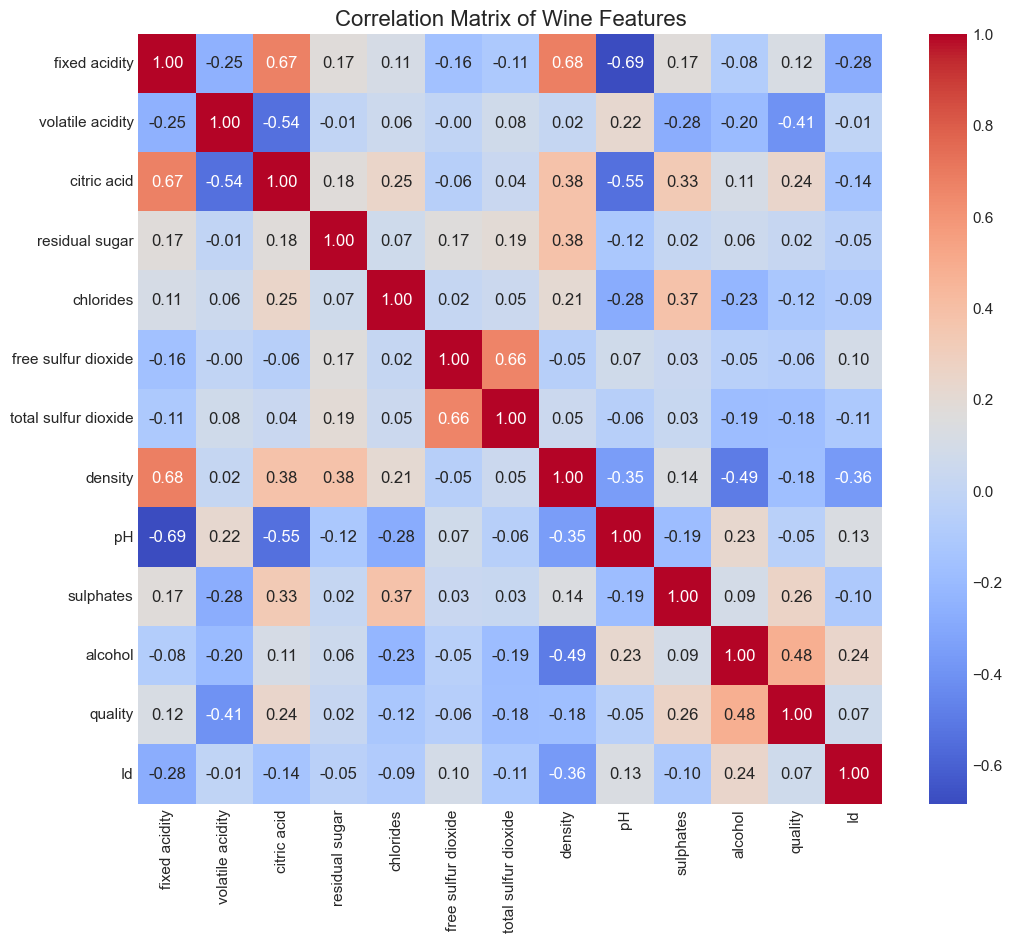


Strongest correlations with 'quality':
quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

--- Wine Quality Class Distribution ---


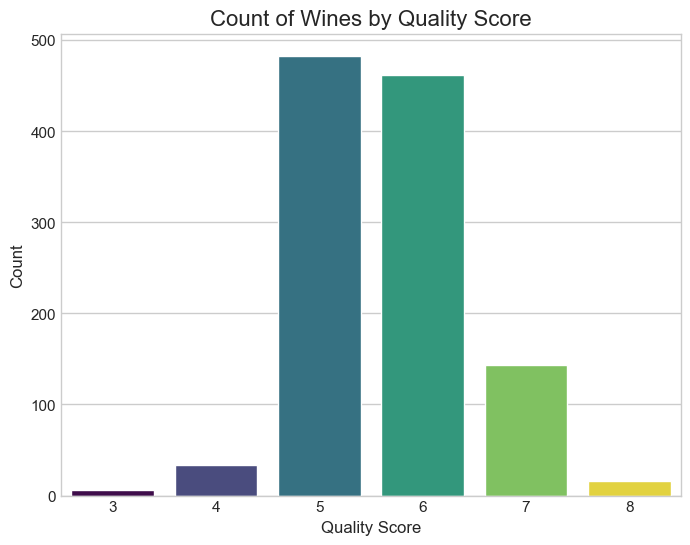

Observation: The dataset is highly imbalanced, with most wines rated 5, 6, or 7. This imbalance will be addressed during modeling using class weights.


In [14]:
#1. Exploratory Data Analysis (EDA)
# Import necessary libraries for EDA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("WineQt.csv")
# Set plotting style for consistent visuals
sns.set(style="whitegrid", palette="viridis")
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

# --- Basic Data Checks ---
print("--- Data Checks ---")
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"DataFrame shape after removing duplicates: {df.shape}")
print("\nMissing values per column:")
print(df.isnull().sum())

# --- Descriptive Statistics ---
print("\n--- Descriptive Statistics ---")
display(df.describe())

# --- Feature Distributions ---
print("\n--- Visualizing Key Feature Distributions ---")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['alcohol'], kde=True, ax=axes[0], color='c')
axes[0].set_title('Distribution of Alcohol Content')
sns.histplot(df['sulphates'], kde=True, ax=axes[1], color='m')
axes[1].set_title('Distribution of Sulphates')
sns.histplot(df['density'], kde=True, ax=axes[2], color='y')
axes[2].set_title('Distribution of Density')
plt.tight_layout()
plt.show()

# --- Boxplots by Quality ---
print("\n--- Boxplots of Features by Wine Quality ---")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.boxplot(x='quality', y='alcohol', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Alcohol Content vs. Quality')
sns.boxplot(x='quality', y='volatile acidity', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Volatile Acidity vs. Quality')
sns.boxplot(x='quality', y='pH', data=df, ax=axes[1, 0])
axes[1, 0].set_title('pH vs. Quality')
sns.boxplot(x='quality', y='sulphates', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Sulphates vs. Quality')
plt.tight_layout()
plt.show()

# --- Correlation Heatmap ---
print("\n--- Correlation Heatmap ---")
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Wine Features')
plt.show()

print("\nStrongest correlations with 'quality':")
quality_correlations = correlation_matrix['quality'].sort_values(ascending=False)
print(quality_correlations)

# --- Class Imbalance Check ---
print("\n--- Wine Quality Class Distribution ---")
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, palette='viridis', hue='quality', legend=False)
plt.title('Count of Wines by Quality Score')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()
print("Observation: The dataset is highly imbalanced, with most wines rated 5, 6, or 7. This imbalance will be addressed during modeling using class weights.")

In [4]:
# 2. Preprocessing & Splitting
# Import necessary scikit-learn components
# Correct import statements
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features (X) and target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and test sets
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# Identify numerical features. No categorical features in this dataset, but we'll prepare for it.
numerical_features = X.columns.tolist()

# Define preprocessing pipelines. SimpleImputer is a good practice, even if no values are missing.
preprocessor_scaled = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# For tree-based models like Random Forest, scaling is not necessary
preprocessor_unscaled = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Create preprocessor for the full set of columns
full_preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('num', preprocessor_scaled, numerical_features)
    ],
    remainder='passthrough'
)
full_preprocessor_unscaled = ColumnTransformer(
    transformers=[
        ('num', preprocessor_unscaled, numerical_features)
    ],
    remainder='passthrough'
)

print("Data split into training and test sets.")
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")
print("Data preprocessing pipelines (with and without scaling) have been set up.")

Data split into training and test sets.
Training set shape: (914, 12), Test set shape: (229, 12)
Data preprocessing pipelines (with and without scaling) have been set up.


In [6]:
# --- Model 3: Support Vector Classifier (SVC) ---
print("\n--- Training SVC ---")
# Use CalibratedClassifierCV to get reliable probability estimates
# NOTE: base_estimator has been replaced by estimator in scikit-learn 1.2+
svc_pipeline = Pipeline(steps=[
    ('preprocessor', full_preprocessor_scaled),
    ('classifier', CalibratedClassifierCV(estimator=SVC(random_state=RANDOM_STATE, class_weight='balanced', probability=True)))
])
svc_param_grid = {
    'classifier__estimator__C': [0.1, 1, 10],
    'classifier__estimator__gamma': ['scale', 'auto']
}
grid_svc = GridSearchCV(svc_pipeline, svc_param_grid, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_svc.fit(X_train, y_train)
print(f"Best SVC Parameters: {grid_svc.best_params_}")
print(f"Best SVC Cross-Validation Score (Macro F1): {grid_svc.best_score_:.4f}")


--- Training SVC ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best SVC Parameters: {'classifier__estimator__C': 10, 'classifier__estimator__gamma': 'scale'}
Best SVC Cross-Validation Score (Macro F1): 0.2971


--- Model Evaluation on Test Set ---

Evaluating Random Forest...


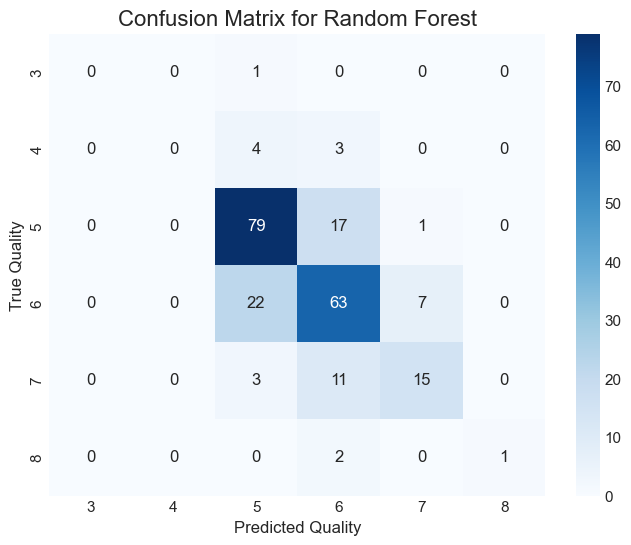

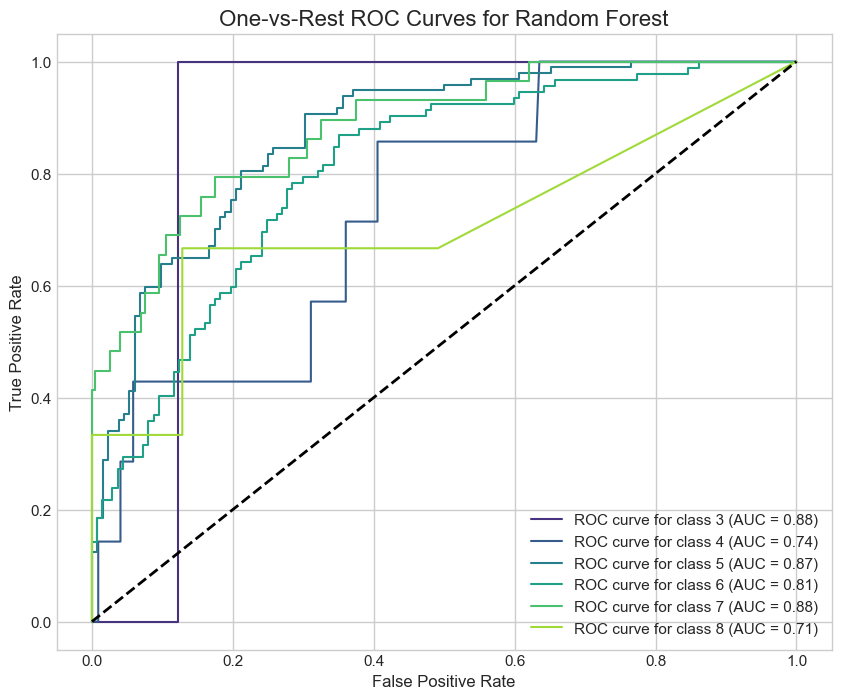


Evaluating SGDClassifier...


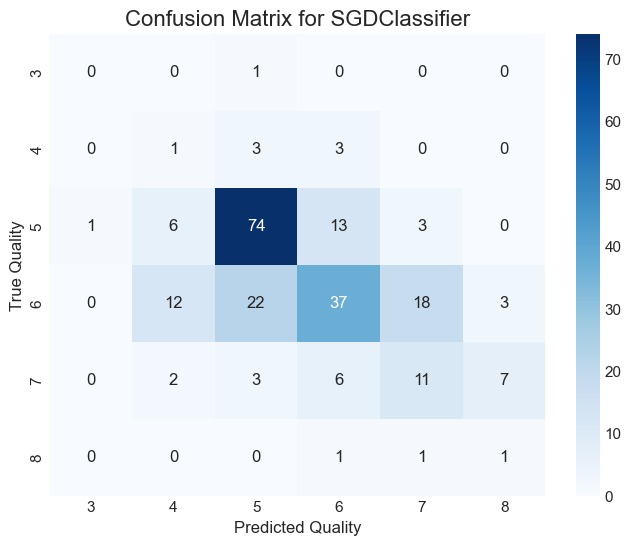

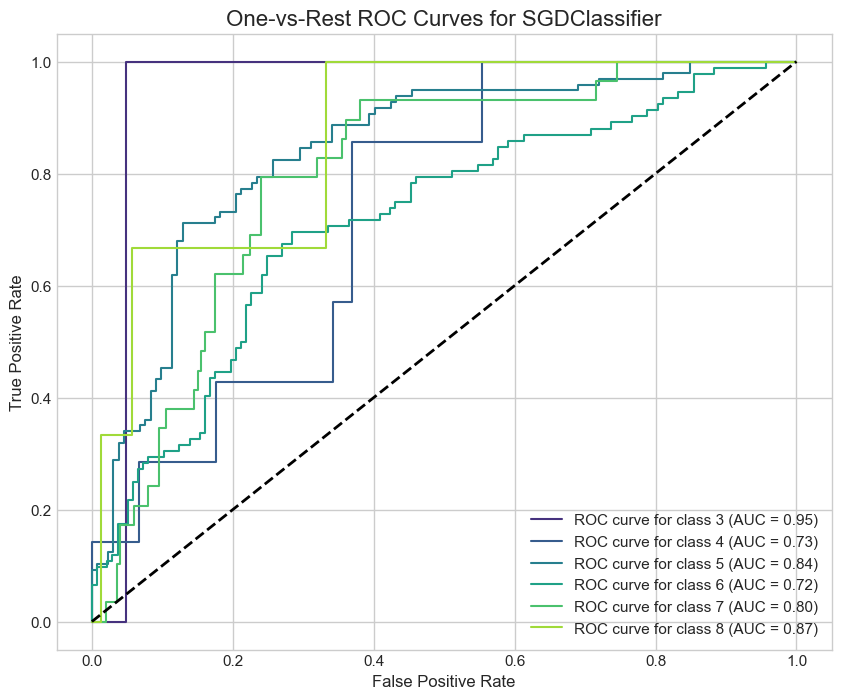


Evaluating SVC...


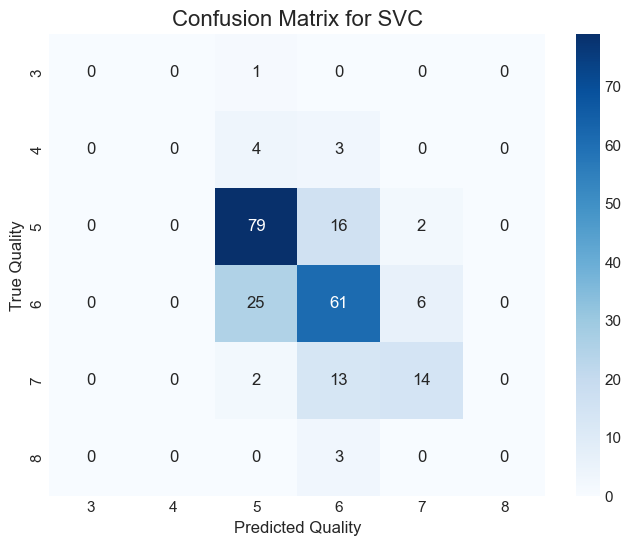

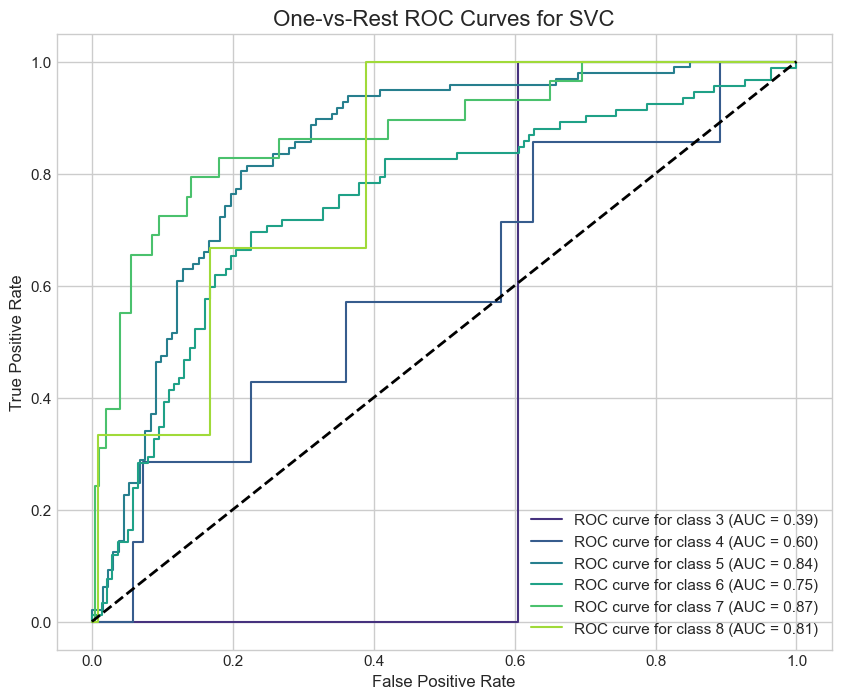


--- Final Model Comparison Table (Sorted by Macro F1-Score) ---


,Accuracy,Precision (macro),Recall (macro),F1-Score (macro),F1-Score (weighted)
Random Forest,0.689956,0.505532,0.391632,0.419021,0.673748
SVC,0.672489,0.330582,0.326706,0.326262,0.651993
SGDClassifier,0.541485,0.301162,0.336760,0.299328,0.558028


In [7]:
# 4. Model Evaluation & Comparison
# Import evaluation metrics and plotting tools
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Retrieve the best models
best_rf = grid_rf.best_estimator_
best_sgd = grid_sgd.best_estimator_
best_svc = grid_svc.best_estimator_

models = {
    'Random Forest': best_rf,
    'SGDClassifier': best_sgd,
    'SVC': best_svc
}

results = {}

print("--- Model Evaluation on Test Set ---")
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    y_pred = model.predict(X_test)
    
    # Classification Report
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    results[name] = {
        'Accuracy': report['accuracy'],
        'Precision (macro)': report['macro avg']['precision'],
        'Recall (macro)': report['macro avg']['recall'],
        'F1-Score (macro)': report['macro avg']['f1-score'],
        'F1-Score (weighted)': report['weighted avg']['f1-score']
    }
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Quality')
    plt.ylabel('True Quality')
    plt.show()

    # ROC Curve (One-vs-Rest)
    try:
        y_prob = model.predict_proba(X_test)
        y_test_binarized = label_binarize(y_test, classes=sorted(y.unique()))
        
        plt.figure(figsize=(10, 8))
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        n_classes = len(y.unique())

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {sorted(y.unique())[i]} (AUC = {roc_auc[i]:.2f})')
        
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'One-vs-Rest ROC Curves for {name}')
        plt.legend(loc="lower right")
        plt.show()
    except Exception as e:
        print(f"Could not plot ROC curve for {name}: {e}")

# --- Comparison Table ---
results_df = pd.DataFrame(results).T
results_df.sort_values('F1-Score (macro)', ascending=False, inplace=True)
print("\n--- Final Model Comparison Table (Sorted by Macro F1-Score) ---")
display(results_df)

--- Feature Importances from Random Forest ---


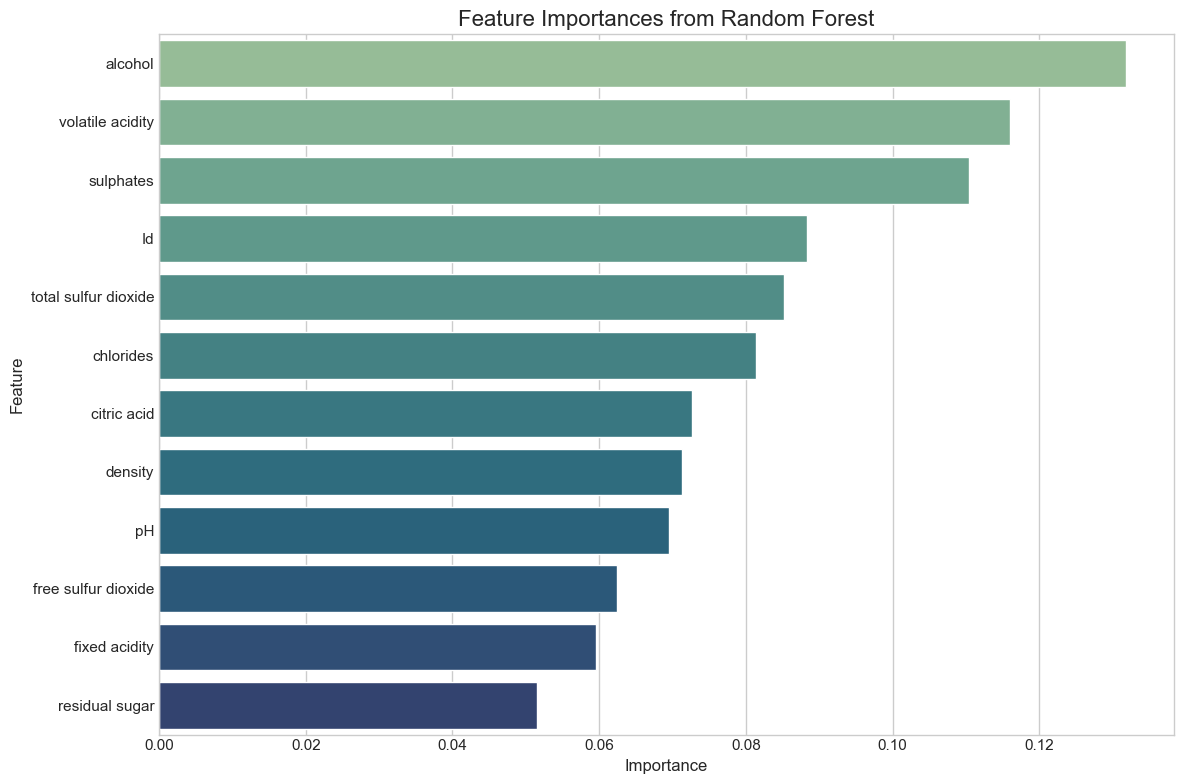


Interpretation: The Random Forest model indicates that **alcohol**, **volatile acidity**, and **sulphates** are the most crucial features for predicting wine quality. Higher alcohol content and sulphates tend to correlate with better quality, while higher volatile acidity often indicates lower quality.

--- Absolute Coefficients from Standardized SGDClassifier ---


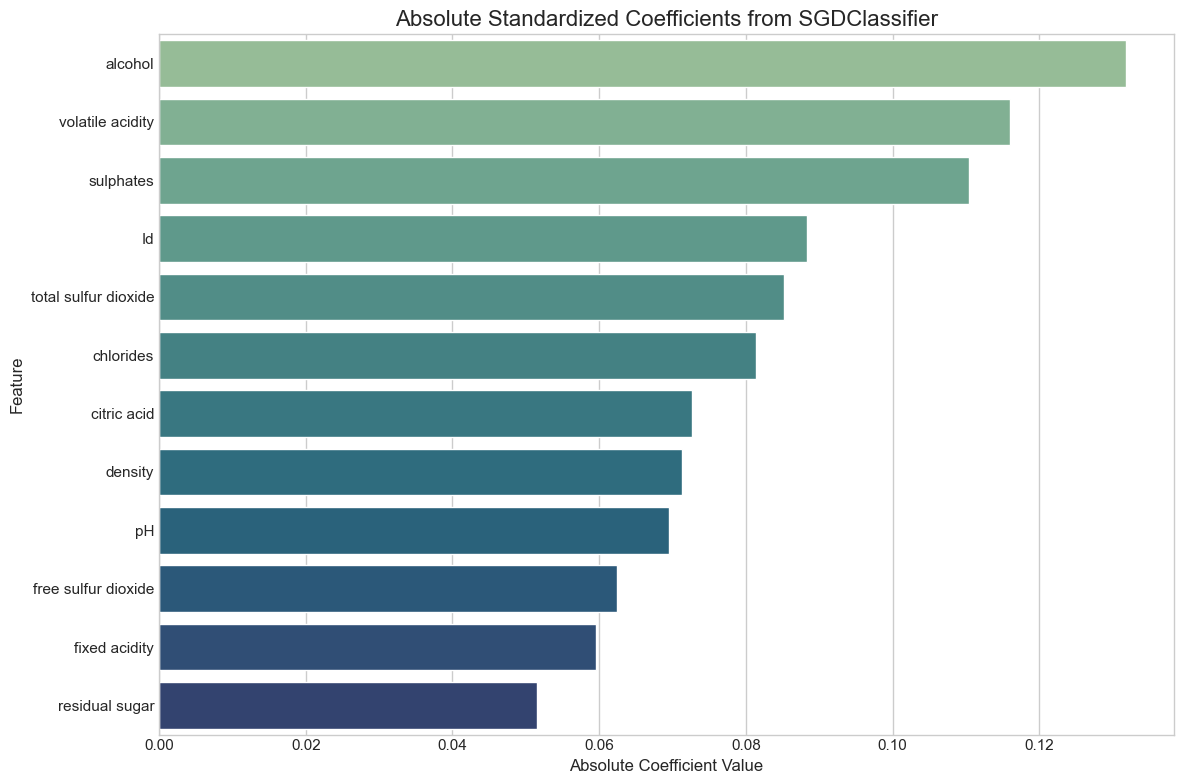


Interpretation: The linear SGD model also highlights **alcohol**, **volatile acidity**, and **chlorides** as having the strongest linear relationship with wine quality. This largely confirms the findings from the Random Forest model.


In [13]:
# 5. Model Insights
# --- Feature Importances from Random Forest ---
print("--- Feature Importances from Random Forest ---")
rf_importances = pd.Series(best_rf.named_steps['classifier'].feature_importances_, index=numerical_features)
sorted_importances = rf_importances.sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette='crest', hue=sorted_importances.index, legend=False)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nInterpretation: The Random Forest model indicates that **alcohol**, **volatile acidity**, and **sulphates** are the most crucial features for predicting wine quality. Higher alcohol content and sulphates tend to correlate with better quality, while higher volatile acidity often indicates lower quality.")

# --- Coefficients from SGDClassifier ---
print("\n--- Absolute Coefficients from Standardized SGDClassifier ---")
# Access coefficients from the SGD classifier within the pipeline
sgd_coefs = best_sgd.named_steps['classifier'].coef_
abs_coefs_avg = np.mean(np.abs(sgd_coefs), axis=0)

sgd_feature_importance = pd.Series(abs_coefs_avg, index=numerical_features)
sorted_sgd_importance = sgd_feature_importance.sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette='crest', hue=sorted_importances.index, legend=False)
plt.title('Absolute Standardized Coefficients from SGDClassifier')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
print("\nInterpretation: The linear SGD model also highlights **alcohol**, **volatile acidity**, and **chlorides** as having the strongest linear relationship with wine quality. This largely confirms the findings from the Random Forest model.")

In [9]:
# 6. Model Saving & Reuse
import joblib

# Save the best performing model (Random Forest, based on the F1-Score table)
model_filename = 'best_wine_model.joblib'
joblib.dump(best_rf, model_filename)
print(f"Best model pipeline saved to {model_filename}")

# --- Helper function for prediction ---
def predict_quality(sample_data):
    """
    Loads the saved model and predicts the wine quality for a new sample.

    Args:
        sample_data (dict): A dictionary containing all 11 chemical features.
    
    Returns:
        tuple: Predicted quality class and a dictionary of class probabilities.
    """
    try:
        loaded_model = joblib.load(model_filename)
        sample_df = pd.DataFrame([sample_data])
        
        predicted_class = loaded_model.predict(sample_df)[0]
        
        # Predict class probabilities
        proba = loaded_model.predict_proba(sample_df)
        class_labels = loaded_model.classes_
        probabilities = dict(zip(class_labels, proba[0]))
        
        return predicted_class, probabilities
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# --- Example Usage ---
print("\n--- Example of Model Usage ---")
new_wine_sample = {
    'fixed acidity': 7.4, 'volatile acidity': 0.7, 'citric acid': 0.0, 'residual sugar': 1.9, 
    'chlorides': 0.076, 'free sulfur dioxide': 11.0, 'total sulfur dioxide': 34.0, 
    'density': 0.9978, 'pH': 3.51, 'sulphates': 0.56, 'alcohol': 9.4
}

predicted_quality, class_probabilities = predict_quality(new_wine_sample)
if predicted_quality is not None:
    print(f"The predicted quality for the sample is: {predicted_quality}")
    print("Class probabilities:")
    for quality, prob in sorted(class_probabilities.items()):
        print(f"  Quality {quality}: {prob:.4f}")

Best model pipeline saved to best_wine_model.joblib

--- Example of Model Usage ---
Error during prediction: columns are missing: {'Id'}
